In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel(r"/Users/bani/Downloads/E Commerce Dataset.xlsx", sheet_name = 'E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

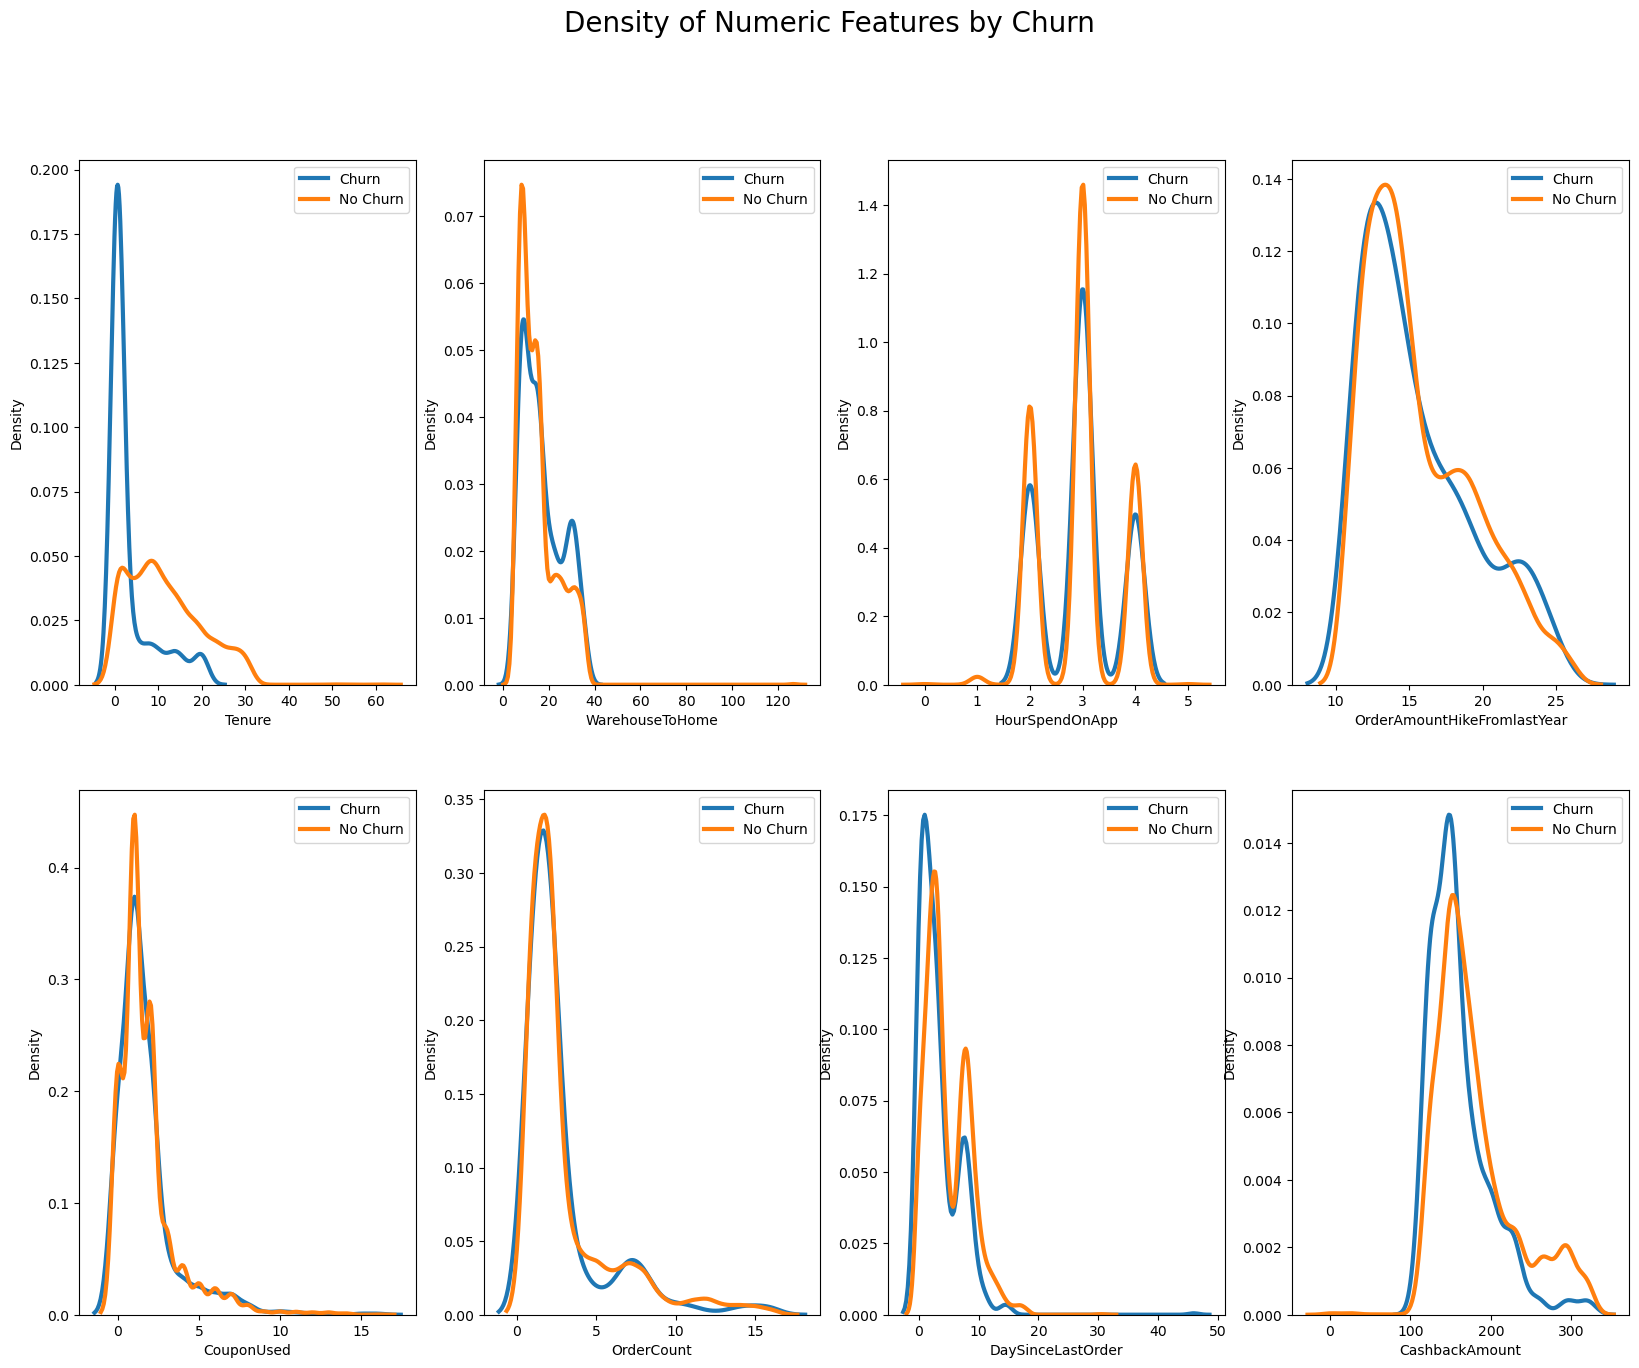

In [27]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

# Insights from the distribution analysis of numeric features:

Tenure: Customers with longer tenure are less likely to churn, suggesting that extended customer relationships indicate higher satisfaction.
CityTier: Churn rates appear consistent across different city tiers, indicating that city tier alone may not be a strong predictor of churn.
WarehouseToHome: Shorter distances from the warehouse to home show lower churn rates, suggesting that faster delivery may contribute to higher satisfaction.
HourSpendOnApp: Increased time spent on the app is associated with lower churn, indicating that higher engagement with the app is a positive sign.
NumberOfDeviceRegistered: More registered devices are linked to lower churn, highlighting that access across multiple devices improves customer convenience and reduces churn.
SatisfactionScore: Higher satisfaction scores strongly correlate with lower churn, emphasizing the critical role of customer satisfaction in retention.
NumberOfAddress: Although there is a slight downward trend, the relationship between the number of addresses and churn suggests that having more addresses indicates customer loyalty.
Complain: A higher number of complaints is associated with higher churn, indicating that addressing customer complaints is crucial to maintaining satisfaction.
OrderAmountHikeFromLastYear: Customers who spent more in the previous year are less likely to churn, emphasizing the importance of retaining high-spending customers.
CouponUsed: The usage of coupons is correlated with lower churn, suggesting that providing and utilizing coupons can enhance customer loyalty.
OrderCount: Higher order counts are linked to lower churn, implying that encouraging frequent usage can build customer habits and reduce churn.
DaySinceLastOrder: A longer time since the last order is associated with higher churn, emphasizing the importance of recency as a predictor of customer retention.

# Is there a relationship between Gender and Churn? 

In [45]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'dark blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

# # Create figure
# fig = px.pie(df, values='OrderCount', names='Gender')
# fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# # Update layout
# fig.update_layout(
#   title='order Rate by Gender',
#   legend_title='Gender'
# )

# # Show plot
# fig.show()


The observation reveals that there is a higher likelihood of churn among male users, with 63.3% of males from the app showing churn. This suggests that the company might want to explore expanding its product offerings to cater more effectively to the preferences and interests of male customers.

# Which MartialStatus has the highest Churn rate?

Text(0, 0.5, 'Churn Rate')

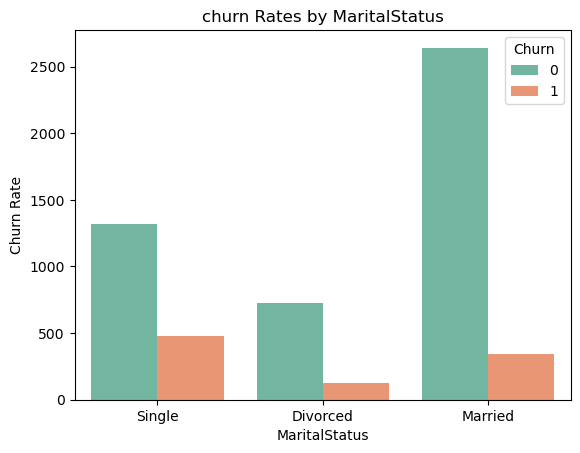

In [46]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

# 
The largest customer segment in the company comprises married individuals. Considering the higher likelihood of churn among single customers, it would be prudent for the company to pay attention to product offerings that cater to the preferences of both single and married customers. This approach ensures a more inclusive strategy that addresses the specific needs of these distinct customer segments.

# Is there a correlation between SatisfactionScore and HourSpendOnApp?

In [48]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()



# sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=df)
# ax = df[['SatisfactionScore','HourSpendOnApp']].value_counts().plot(kind='bar')

While it's observed that individuals with lower satisfaction scores tend to spend less time on the app compared to those with a satisfaction score of 5, it appears that there may not be a substantial correlation between satisfaction scores and the amount of time people spend on the app.

# What is the relation between NumberOfAddress and CityTier within the churn segment?

<Axes: xlabel='CityTier', ylabel='NumberOfAddress'>

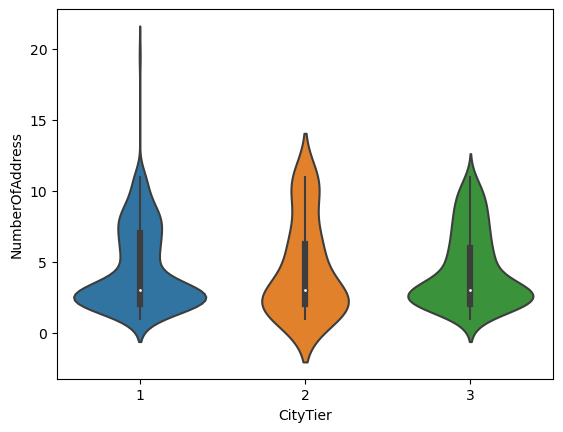

In [50]:
import seaborn as sns
sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])

# 
A negative correlation is observed between CityTier and NumberOfAddress, indicating that higher CityTiers are linked to a lower average number of addresses and a more clustered distribution. Customers residing in larger cities, specifically CityTier 1, tend to possess a higher average number of addresses compared to those in smaller cities and towns with lower tiers. This relationship suggests that address density and the nature of the locality, such as metropolitan areas versus smaller cities and towns, influence the variation in the number of addresses customers have across different city types.

# What is the relation between Complain and DaySinceLastOrder?

In [51]:
import plotly.express as px

fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

# 
A subtle negative correlation exists between the act of complaining and the duration since the last order.

# Is there a relationship between PreferredLoginDevice and churn?

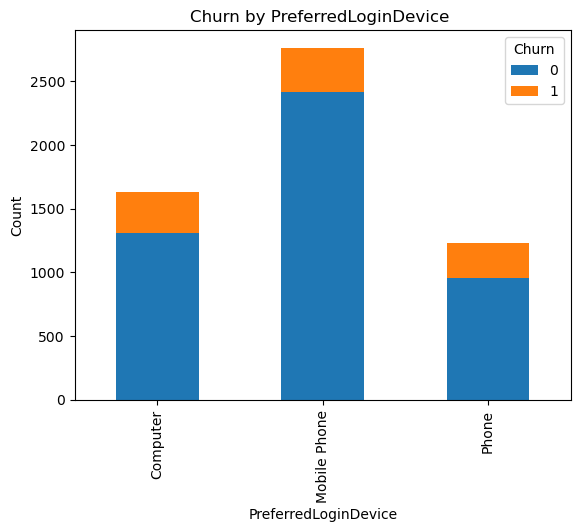

In [52]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()

#
The likelihood of churn among mobile phone users may suggest potential issues with the user experience on the mobile app version.

# Does the percentage increase in order amount from last year affect churn rate?

In [61]:
df['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [62]:
df.groupby('OrderAmountHikeFromlastYear')['Churn'].count()

OrderAmountHikeFromlastYear
11.0    391
12.0    728
13.0    741
14.0    750
15.0    542
16.0    333
17.0    297
18.0    321
19.0    311
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: Churn, dtype: int64

In [63]:
comp_ten = df.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

# 
The graph illustrates that as the percentage of orders from the last year increases, the churn rate decreases. This indicates a positive impact of OrderAmountHikeFromlastYear on the churn rate. 

# What is the relation between Complain and DaySinceLastOrder for churned customers?

In [66]:
fig = px.histogram(df, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

#
Among customers who did not file a complaint, there is one outlier with a higher value for DaySinceLastOrder. Upon excluding this outlier, it becomes evident that customers without complaints generally have a lower value for DaySinceLastOrder.


# Are customers who complained more likely to churn?

In [74]:
df.groupby('Complain')[['Churn']].count()

,Churn
Complain,
0,4026
1,1604


In [80]:
comp_churn = pd.DataFrame(df.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='Count' , color_discrete_sequence=["#2F4B26" , '#FF0000'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508
   Complain  Churn  Count
0         0      0   3586
1         0      1    440
2         1      0   1096
3         1      1    508


#
The absence of complaints does not appear to have a significant impact on churn. The graph illustrates that among customers who made complaints, 68% did not churn.